In [33]:
import torch
import os
import numpy as np
from sklearn import manifold
import random
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import pair_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [34]:
def get_file(path):
    features = torch.load(os.path.join(path, "features.pth"))
    person_ids = torch.load(os.path.join(path, "person_ids.pth"))
    pseudo_labels = torch.load(os.path.join(path, "pseudo_labels.pth"))
    pseudo_labels = torch.tensor(pseudo_labels[0])
    
    all_instance = len(person_ids)
    unlabeled_instance = len(torch.nonzero(person_ids == torch.tensor(-1)))
    labelded_instance = all_instance - unlabeled_instance
    return features, person_ids, pseudo_labels

In [35]:
def id_mapping(ids):
    # 将person id映射到从0开始编码
    unique_ids = set(np.array(ids))
    mapping = {}
    for i, value in enumerate(list(unique_ids)):
        mapping[value] = i
    Y = np.array(ids).copy()
    for i in range(Y.shape[0]):
        Y[i] = mapping[Y[i]]
    return Y

In [84]:
def get_selected_idx(num_person_ids, person_ids, pseudo_labels):
    # select_person_ids, select_length, select_idx = [], [], []
    # for idx in range(num_person_ids):
    #     length = len(torch.nonzero(person_ids == torch.tensor(idx)))
    #     if 60 < length and length <= 65:
    #         select_idx += torch.nonzero(person_ids == torch.tensor(idx))
    #         select_person_ids.append(idx)
    #         select_length.append(length)
    #     if len(select_person_ids) == 9:
    #         break
    # print(select_person_ids)
    # return select_idx
    
    
    idxs = [47, 197, 263, 266, 474, 161, 107, 477, 99]
    select_idx = []
    for idx in idxs:
        select_idx += torch.nonzero(person_ids == torch.tensor(idx))
    return select_idx

In [53]:
def get_X_Y(path):
    features, person_ids, pseudo_labels = get_file(path)
    num_person_ids = len(set(person_ids.numpy()))
    select_idx = get_selected_idx(num_person_ids, person_ids, pseudo_labels)
    select_features = features[select_idx]
    select_person_ids = person_ids[select_idx]
    select_pseudo_labels = pseudo_labels[select_idx]

    X = select_features

    Y = id_mapping(select_person_ids)
    select_pseudo_labels = id_mapping(select_pseudo_labels)

    select_person_ids = select_person_ids.tolist()
    select_pseudo_labels = select_pseudo_labels.tolist()
    return X, Y, select_person_ids

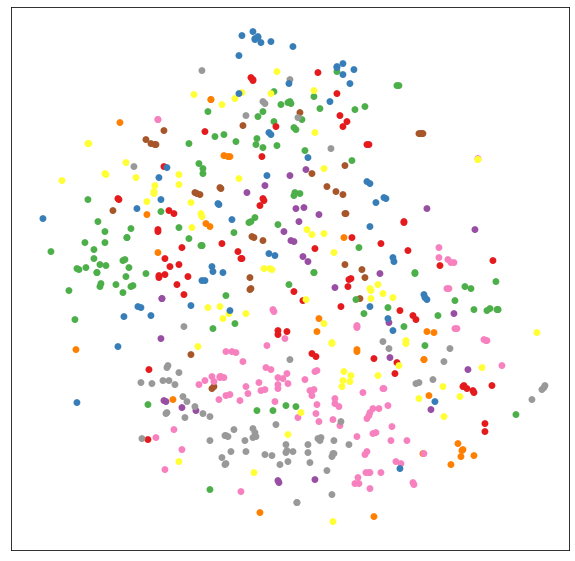

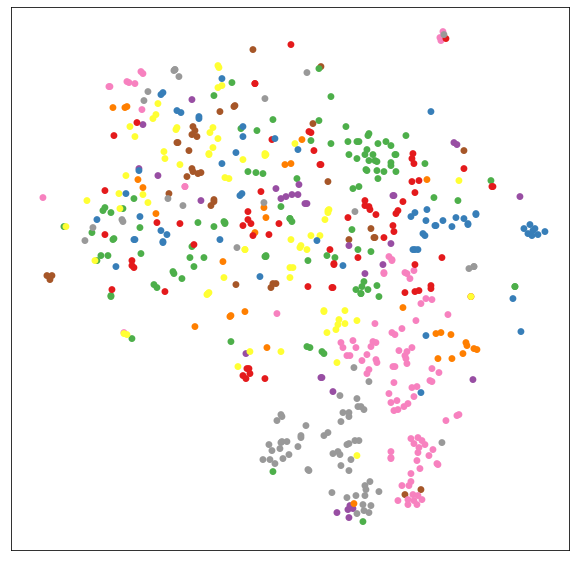

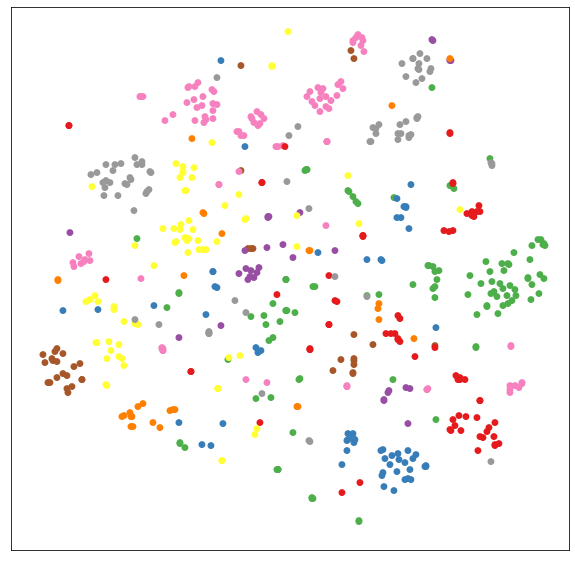

In [116]:
def visualize(X, y, select_person_ids, name):
    '嵌入空间可视化'''
    x_min, x_max = X.min(0), X.max(0)
    X_norm = 0.05 + (X - x_min) / (x_max - x_min) * (0.95 - 0.05)  # 归一化
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    for i in range(X_norm.shape[0]):
        # plt.text(X_norm[i, 0], X_norm[i, 1], str(select_person_ids[i]), color=plt.cm.Set1(y[i]), fontdict={'weight': 'bold', 'size': 9})
        plt.text(X_norm[i, 0], X_norm[i, 1], '●', color=plt.cm.Set1(y[i]), fontdict={'weight': 'bold', 'size': 9})  # default:9
    plt.xticks([])
    plt.yticks([])
    # plt.savefig("./tSNE.jpg", bbox_inches='tight', pad_inches=0)
    plt.savefig(f'./rebuttal_{name}.eps', dpi=100, format='eps', bbox_inches='tight', pad_inches=0)
    plt.show()

def tsne_feat(path, perplexity):
    X, Y, select_person_ids = get_X_Y(path)
    X_tsne = manifold.TSNE(n_components=2, perplexity=perplexity, learning_rate=500, early_exaggeration=50, init='pca', random_state=501, n_iter=600, verbose=0, metric='cosine', method='barnes_hut').fit_transform(X)
    return X_tsne, Y, select_person_ids

X_tsne, Y, person_ids = tsne_feat('DBSCAN', perplexity=80)
visualize(X_tsne, Y, person_ids, 'DBSCAN')
X_tsne, Y, person_ids = tsne_feat('FINCH', perplexity=40)
visualize(X_tsne, Y, person_ids, 'FINCH')
X_tsne, Y, person_ids = tsne_feat('FINCH_context', perplexity=80)
visualize(X_tsne, Y, person_ids, 'FINCH_context')
